# Numpy & Images

In [1]:
# I need to install PIL, matplotlib

# conda install -c anaconda pillow
# conda install matplotlib

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

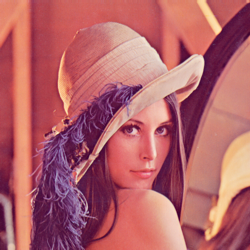

In [3]:
img = Image.open("../data/lenna.png").resize((250, 250))
img

In [4]:
img.size

(250, 250)

In [5]:
img_array = np.array(img)
img_array

array([[[226, 137, 126],
        [223, 137, 129],
        [226, 134, 119],
        ...,
        [231, 147, 129],
        [232, 148, 123],
        [212, 118, 102]],

       [[226, 137, 126],
        [223, 137, 130],
        [226, 134, 119],
        ...,
        [232, 149, 130],
        [234, 151, 125],
        [215, 121, 103]],

       [[227, 138, 124],
        [224, 135, 121],
        [226, 134, 118],
        ...,
        [221, 131, 117],
        [212, 119, 105],
        [177,  84,  89]],

       ...,

       [[ 90,  28,  61],
        [ 92,  29,  62],
        [ 96,  29,  63],
        ...,
        [139,  53,  73],
        [157,  62,  74],
        [162,  60,  75]],

       [[ 86,  22,  60],
        [ 92,  26,  61],
        [ 94,  26,  62],
        ...,
        [153,  64,  81],
        [171,  69,  81],
        [171,  66,  79]],

       [[ 83,  22,  57],
        [ 94,  29,  62],
        [ 95,  25,  61],
        ...,
        [166,  69,  84],
        [178,  69,  80],
        [183,  72,  81]]

In [6]:
type(img_array)

numpy.ndarray

In [7]:
img_array.shape

(250, 250, 3)

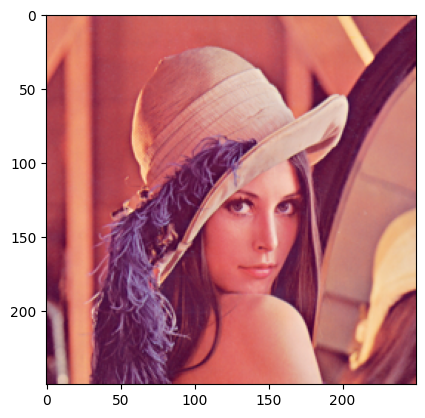

In [8]:
plt.imshow(img_array)

## RGB Channels

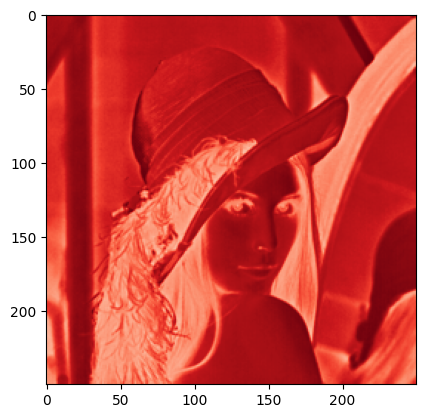

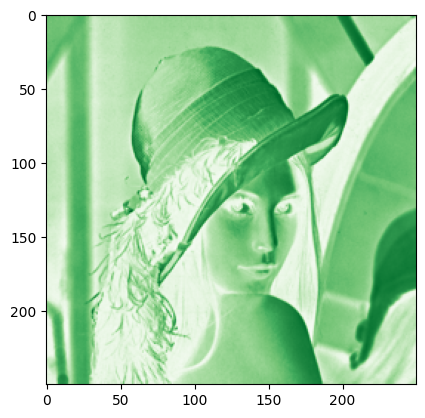

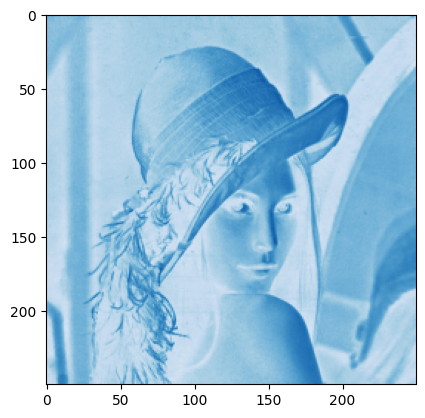

In [9]:
cmaps = ["Reds", "Greens", "Blues"]
for index, cmap in enumerate(cmaps):
    plt.imshow(img_array[:, :, index], cmap=cmap, vmin=0, vmax=255)
    plt.show()

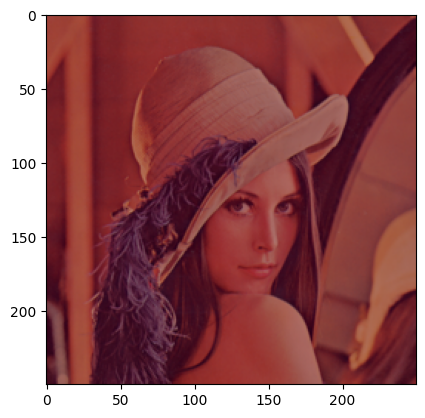

In [10]:
img_array_2 = img_array.copy()

# Red
img_array_2[:, :, 0] = img_array[:, :, 0] * 0.7
# Green
img_array_2[:, :, 1] = img_array[:, :, 1] * 0.5
# Blue
img_array_2[:, :, 2] = img_array[:, :, 2] * 0.5

plt.imshow(img_array_2)

<Figure size 640x480 with 0 Axes>

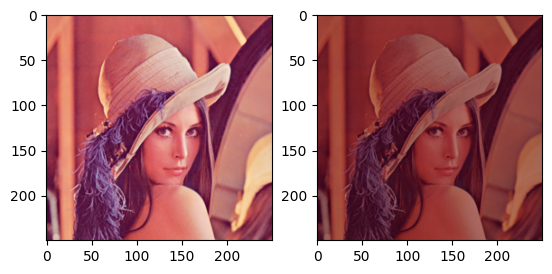

In [11]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2) 
axarr[0].imshow(img_array)
axarr[1].imshow(img_array_2)

## Crop

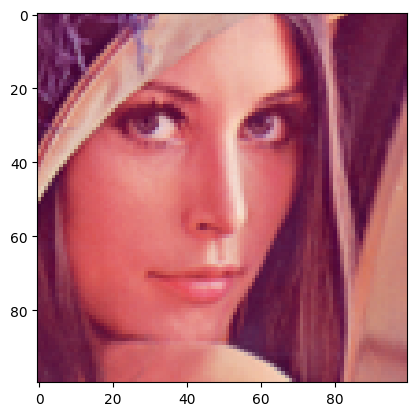

In [12]:
plt.imshow(img_array[100:200,100:200,:])

## Rotate

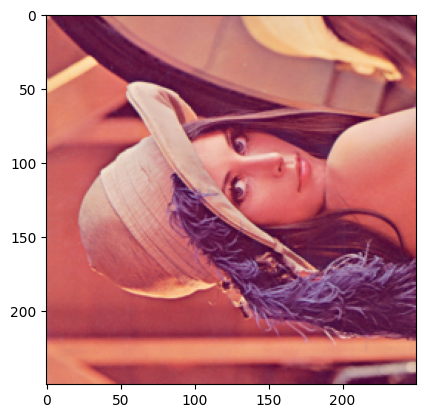

In [13]:
plt.imshow(np.rot90(img_array))

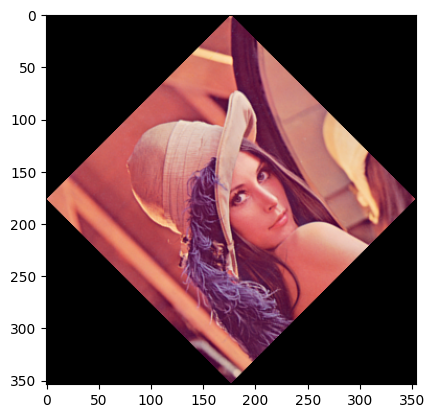

In [14]:
from scipy.ndimage import rotate
rot_array = rotate(img_array, angle=45)
plt.imshow(rot_array)

## Grayscale

### Solution 1: Average

In [13]:
img_gray = np.average(img_array, axis=-1)
img_gray.shape

(250, 250)

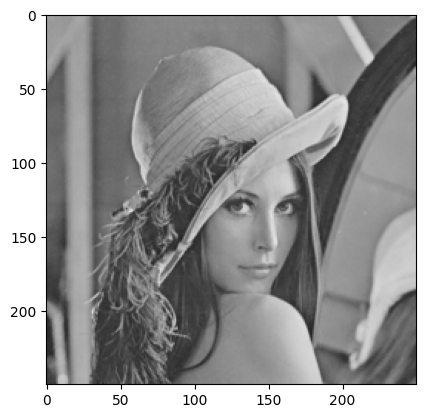

In [14]:
img_gray = img_array.copy()
img_gray[:, :, 0] = np.average(img_array, axis=-1)
img_gray[:, :, 1] = img_gray[:, :, 0]
img_gray[:, :, 2] = img_gray[:, :, 0]

plt.imshow(img_gray)

### Solution 2: MinMax

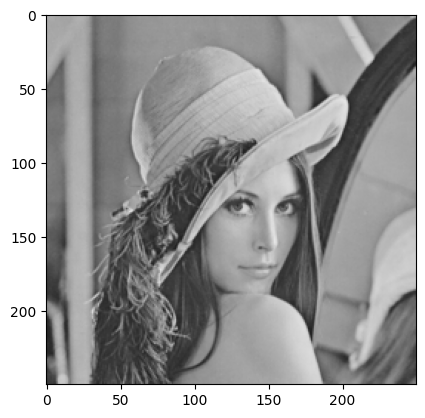

In [15]:
img_minmax = img_array.copy()
img_minmax[:, :, 0] = np.max(img_array, axis=-1)/2 + np.min(img_array, axis=-1)/2
img_minmax[:, :, 1] = img_minmax[:, :, 0]
img_minmax[:, :, 2] = img_minmax[:, :, 0]

plt.imshow(img_minmax)

### Solution 3: Luma

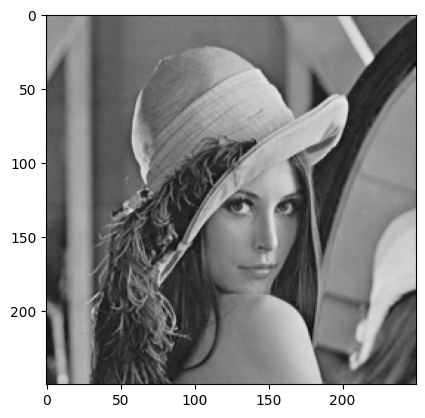

In [16]:
img_luma = img_array.copy()
img_luma[:, :, 0] = np.dot(img_array, [0.21, 0.72, 0.07])
img_luma[:, :, 1] = img_luma[:, :, 0]
img_luma[:, :, 2] = img_luma[:, :, 0]

plt.imshow(img_luma)

### Solution 4: Min

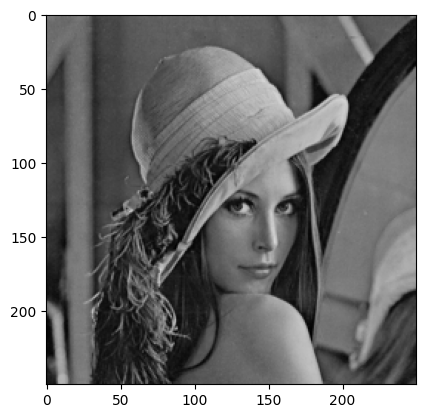

In [17]:
img_min = img_array.copy()
img_min[:, :, 0] = np.min(img_array, axis=-1)
img_min[:, :, 1] = img_min[:, :, 0]
img_min[:, :, 2] = img_min[:, :, 0]

plt.imshow(img_min)

### Solution 5: Max

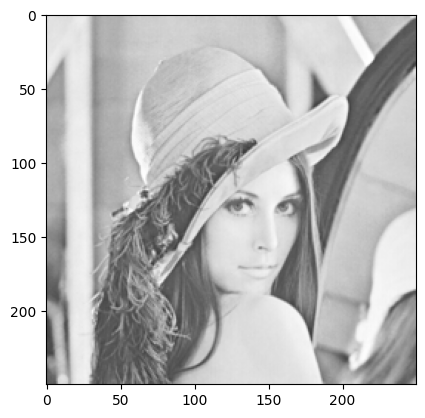

In [18]:
img_max = img_array.copy()
img_max[:, :, 0] = np.max(img_array, axis=-1)
img_max[:, :, 1] = img_max[:, :, 0]
img_max[:, :, 2] = img_max[:, :, 0]

plt.imshow(img_max)

### Comparison

<Figure size 640x480 with 0 Axes>

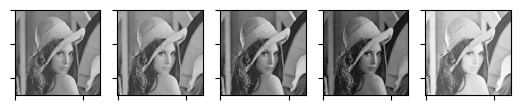

In [19]:
plt.figure()

f, axarr = plt.subplots(1, 5)
axarr[0].imshow(img_gray)
axarr[1].imshow(img_minmax)
axarr[2].imshow(img_luma)
axarr[3].imshow(img_min)
axarr[4].imshow(img_max)

for i in range(5):
    axarr[i].set_yticklabels([])
    axarr[i].set_xticklabels([])

plt.show()